## CARGA DE DATASET Y LIBRERIAS

## Importacion de Librerias

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Leemos el dataset original y traemos las tablas necesarias

In [12]:
df_hechos = pd.read_excel('homicidios.xlsx',sheet_name='HECHOS')

In [13]:
df_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')

### Analizamos nulos y repetidos

### Tabla de `Hechos`

In [16]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   695 non-null    object        
 7   HH                     695 non-null    float64       
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [22]:
df_hechos['ID'].value_counts()

ID
2016-0001    1
2019-0050    1
2019-0042    1
2019-0043    1
2019-0044    1
            ..
2017-0111    1
2017-0112    1
2017-0113    1
2017-0114    1
2021-0097    1
Name: count, Length: 696, dtype: int64

#### En la tabla de Hechos, vemos que no se repiten los Id, por lo que cada uno representa un reporte individual, se presentan nulos, pero estos estan justificados ya que altura y cruce no se dan en todos los casos, las columnas de referencias geograficas van a ser reemplazadas por otro dataset que es aplicado directamente en Power BI.

### Tabla de `Victimas`

In [19]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [21]:
df_victimas['ID_hecho'].value_counts()

ID_hecho
2017-0035    3
2017-0050    2
2016-0041    2
2018-0015    2
2020-0063    2
            ..
2017-0115    1
2017-0116    1
2017-0118    1
2017-0120    1
2021-0096    1
Name: count, Length: 696, dtype: int64

#### En la tabla de Victimas, vemos que se repiten los Id, esto se debe a que hay diferentes roles de victima a cada reporte, no se presentan nulos en esta tabla

### Leemos los CSV pasados por el ETL

In [193]:
df_hechos = pd.read_csv('Hechos.csv')

In [194]:
df_victimas = pd.read_csv('Victimas.csv')

`Aclaracion`
#### Los campos SD se mantienen y luego van a ser eliminados en posteriores analisis y filtrados en Power BI, borrarlos es eliminar un registro que puede alterar los expedientes

### IDENTIFICACION DE VARIABLES SIGNIFICATIVAS

Verificamos las variables que parecen ser mas significativas. Checkamos el primer registro rapidamente

In [10]:
df_hechos.head(1)

,Id,Victimas,Fecha,Año,Mes,Dia,Hora,Franja_horaria,Tipo_de_via,Calle,Altura,Cruce,Comuna,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,MOTO,AUTO


In [9]:
df_victimas.head(1)

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00


En un vistazo nos damos cuenta que la mayoria de las variables son categoricas.   
Analizamos las variables categoricas que parecen ser mas representativas usando graficas de barras de frecuencia horizontales, para corroborar cuales de ellas tienen por si mismas una mayor significancia  

In [21]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

In [12]:
print('columnas en df_homicidios_hechos_prepared: ','[' + ', '.join(df_hechos.keys()) + ']') 


columnas en df_homicidios_hechos_prepared:  [Id, Victimas, Fecha, Año, Mes, Dia, Hora, Franja_horaria, Tipo_de_via, Calle, Altura, Cruce, Comuna, Victima, Acusado]


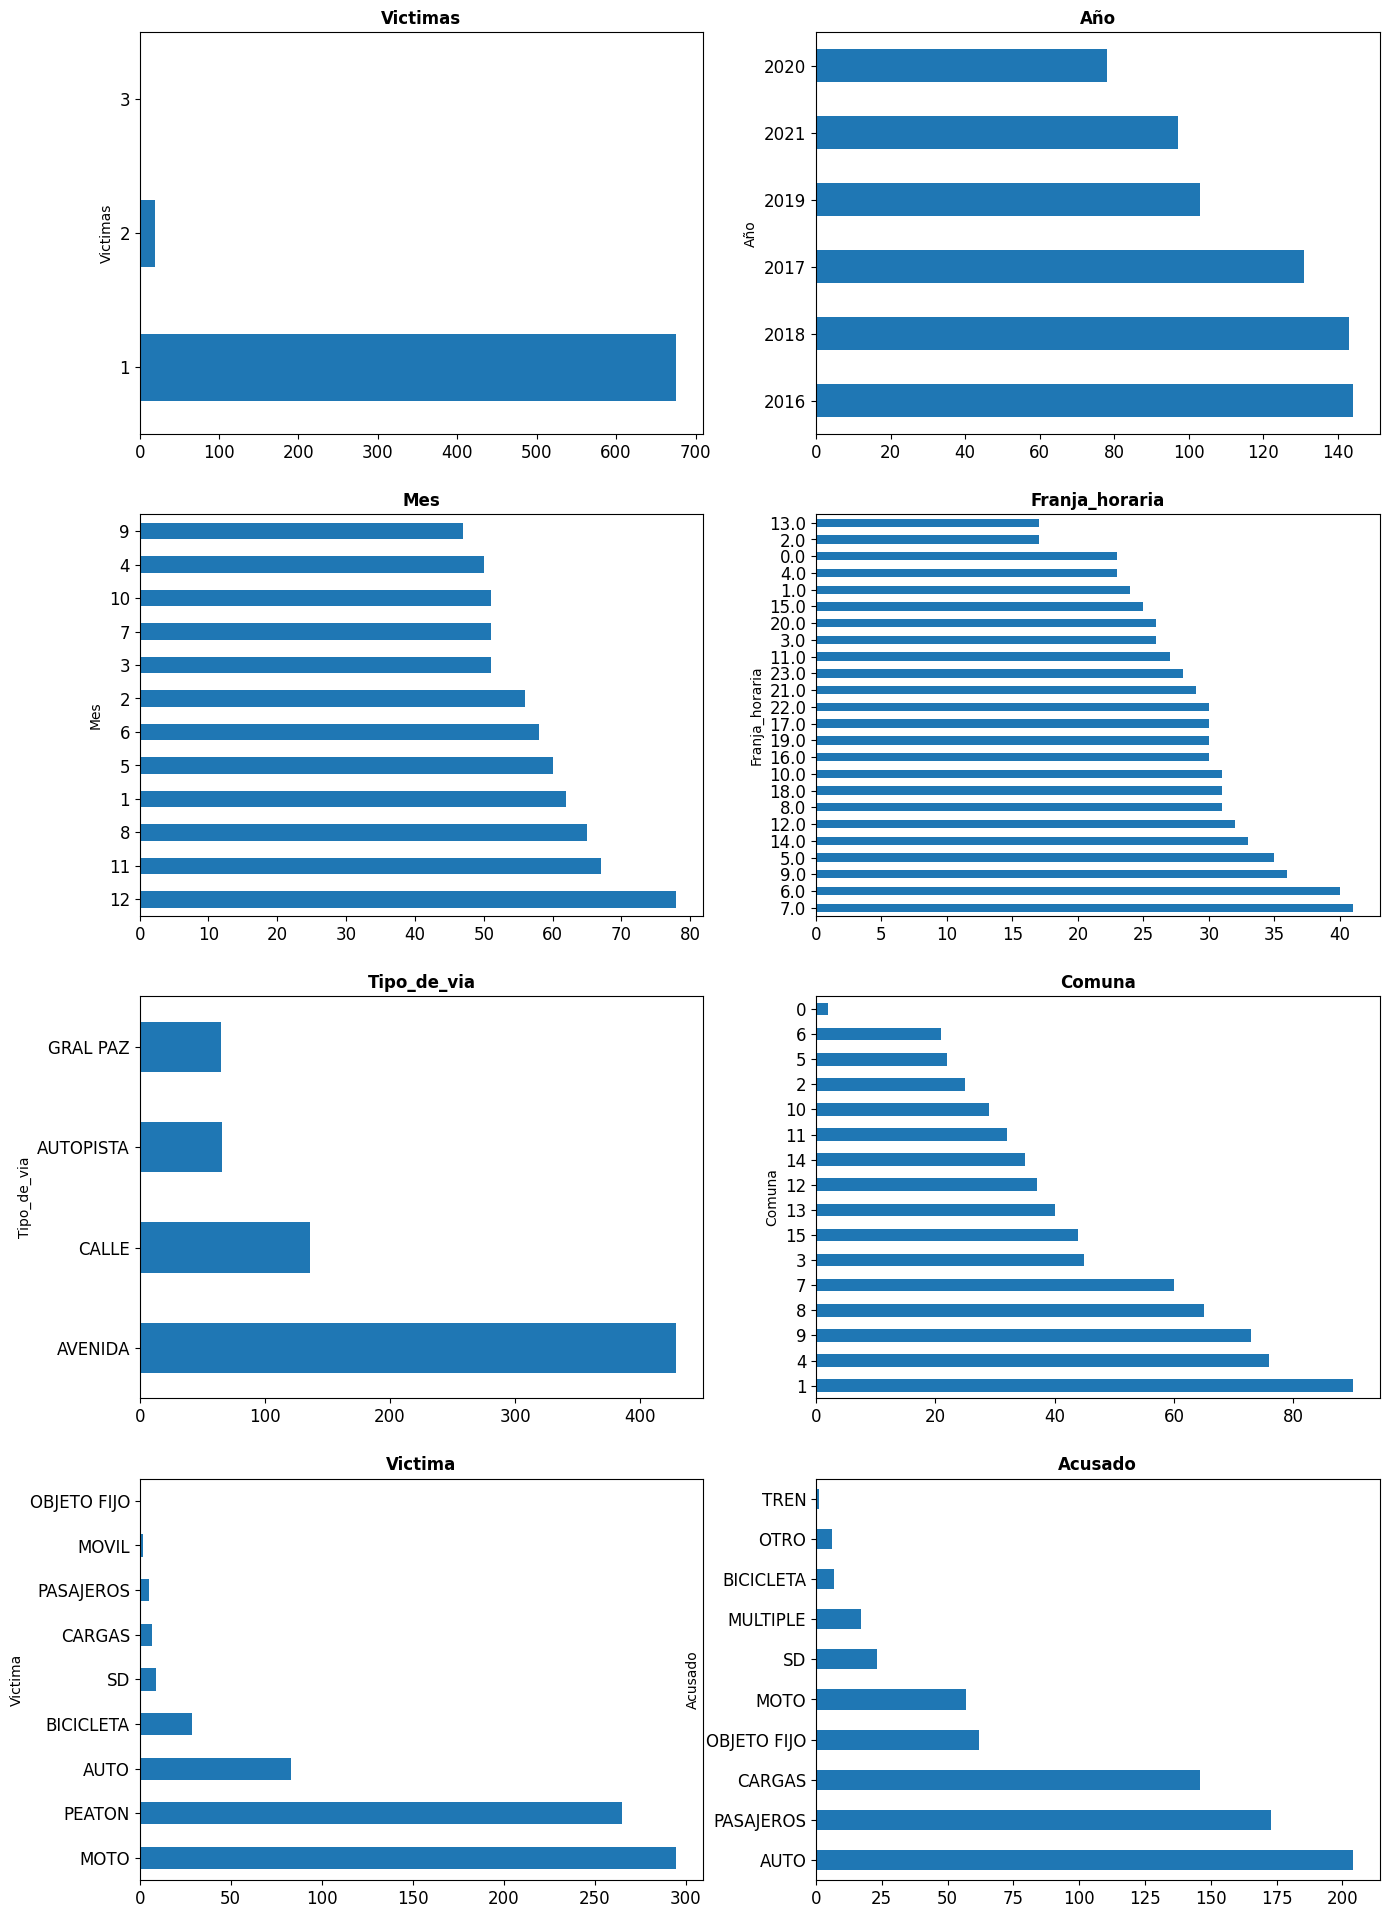

In [22]:
graficos_eda_categoricos(df_hechos[['Victimas', 'Año', 'Mes', 'Franja_horaria', 'Tipo_de_via', 'Comuna', 'Victima', 'Acusado']])

In [23]:
print('columnas en df_homicidios_hechos_prepared: ','[' + ', '.join(df_victimas.keys()) + ']') 

columnas en df_homicidios_hechos_prepared:  [Id, Fecha, Año, Mes, Dia, Rol, Victima, Sexo, Edad, Fallecimiento]


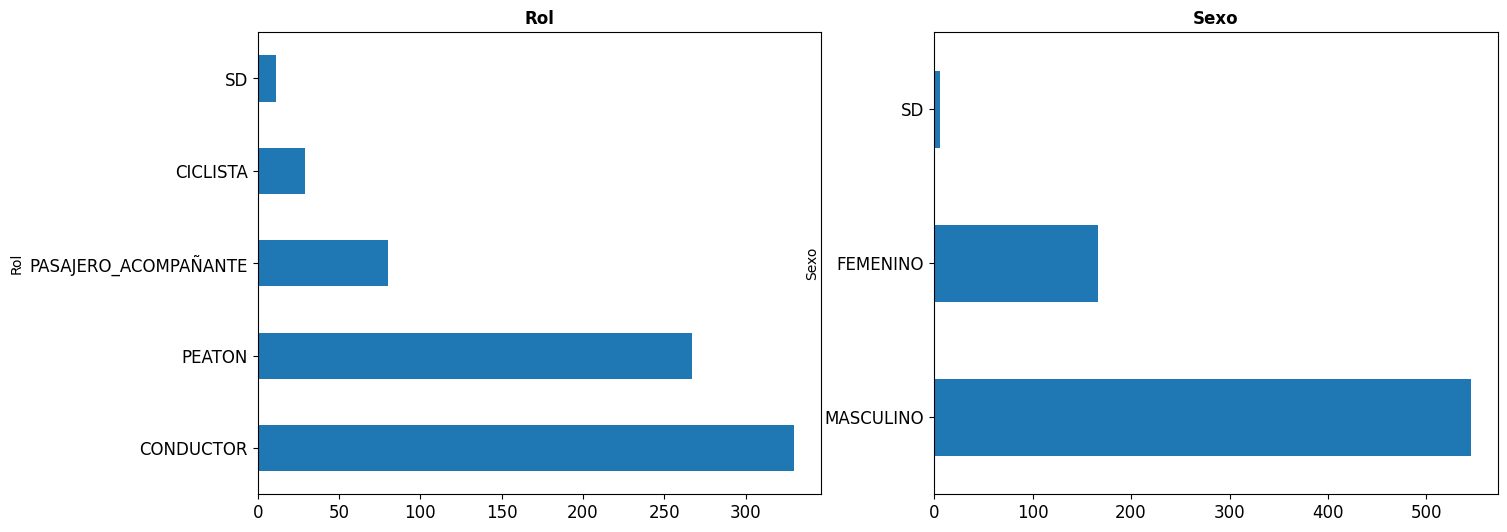

In [52]:
graficos_eda_categoricos(df_victimas[['Rol', 'Sexo']])

### Resumen de los graficos
* Se detectan algunos Outliers en `Victimas`, `Tipo de via`, `Victima` y `Sexo`, no son valores atipicos, ya que, al ser datos estadisticos, y ante la gran variedad de cantidad de victimas y tipos de accidente, estos valores estan deacuerdo con lo planteado en este analisis
* Los valores SD representan que esta sin datos, pero no son valores nulos, de todas formas van a ser eliminados en los analisis posteriores y en Power Bi filtrados


### Resultados del Analisis:
* Variables a ser analizadas: 
    * Año
    * Mes
    * Franja Horaria
    * Victima
    * Comuna
    * Acusado
    * Tipo de Via    
    

## Analisis de las variables individualmente

### Analisis de Muertes por `Año`

In [181]:
pivot_df = pd.pivot_table(df_hechos, index='Año', columns='Acusado', values='Victimas', aggfunc='sum')
pivot_df = pivot_df.drop('SD', axis=1)
pivot_df = pivot_df.replace(np.nan, 0)
pivot_df

Acusado,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,TREN
Año,,,,,,,,,
2016,39.0,1.0,25.0,14.0,2.0,9.0,1.0,42.0,0.0
2017,40.0,1.0,29.0,7.0,4.0,21.0,0.0,34.0,0.0
2018,39.0,1.0,38.0,16.0,4.0,0.0,2.0,47.0,0.0
2019,34.0,2.0,21.0,8.0,4.0,7.0,2.0,22.0,1.0
2020,27.0,0.0,14.0,10.0,1.0,10.0,0.0,19.0,0.0
2021,31.0,2.0,23.0,3.0,2.0,20.0,1.0,14.0,0.0


In [195]:
muertes_año = df_hechos['Año'].value_counts().reset_index()
muertes_año.columns = ['Año', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Año': ['Total'], 'Siniestros': [total_siniestros]})
muertes_año = pd.concat([muertes_año, fila_total], ignore_index=True)

print(muertes_año)


     Año  Siniestros
0   2016         144
1   2018         143
2   2017         131
3   2019         103
4   2021          97
5   2020          78
6  Total         696


* El `Año` nos muestra la cantidad de siniestros por año y nos permite ver un paronama de como evolucionaron estadisticamente los accidentes.
    * El año 2018 muestra un aumento respecto a los dos años anteriores volviendo a bajar en 2019
    * Los años 2020 y 2021, nos muestra los datos de la cuarentena por la pandemia de COVID 19

### Analisis de Siniestros por `Mes`

In [196]:
pivot_df = pd.pivot_table(df_hechos, index='Acusado', columns='Mes', values='Victimas', aggfunc='sum')
pivot_df = pivot_df.drop('SD', axis=0)
pivot_df = pivot_df.replace(np.nan, 0)
pivot_df

Mes,1,2,3,4,5,6,7,8,9,10,11,12
Acusado,,,,,,,,,,,,
AUTO,18.0,23.0,15.0,12.0,18.0,17.0,19.0,19.0,16.0,9.0,16.0,28.0
BICICLETA,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
CARGAS,15.0,9.0,13.0,16.0,10.0,17.0,15.0,14.0,11.0,12.0,10.0,8.0
MOTO,5.0,3.0,4.0,2.0,5.0,4.0,1.0,3.0,3.0,9.0,7.0,12.0
MULTIPLE,5.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0
OBJETO FIJO,6.0,10.0,7.0,5.0,6.0,2.0,4.0,7.0,5.0,6.0,5.0,4.0
OTRO,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0
PASAJEROS,12.0,12.0,13.0,11.0,16.0,12.0,10.0,20.0,11.0,14.0,22.0,25.0
TREN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [197]:
muertes_año = df_hechos['Mes'].value_counts().reset_index()
muertes_año.columns = ['Mes', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Mes': ['Total'], 'Siniestros': [total_siniestros]})
muertes_año = pd.concat([muertes_año, fila_total], ignore_index=True)
print(muertes_año)

      Mes  Siniestros
0      12          78
1      11          67
2       8          65
3       1          62
4       5          60
5       6          58
6       2          56
7       3          51
8       7          51
9      10          51
10      4          50
11      9          47
12  Total         696


#### Resultados del Analisis: 
Noviembre y Diciembre registran mas siniestros que el resto de meses, pero las diferencias no son amplias
No se verifican tendencias claras


### Analisis de Siniestros por `Franja_horaria`

In [198]:
muertes_franaja = df_hechos['Franja_horaria'].value_counts().reset_index()
muertes_franaja.columns = ['Franja', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Franja': ['Total'], 'Siniestros': [total_siniestros]})
muertes_franajas = pd.concat([muertes_franaja, fila_total], ignore_index=True)

print(muertes_franajas)

   Franja  Siniestros
0     7.0          41
1     6.0          40
2     9.0          36
3     5.0          35
4    14.0          33
5    12.0          32
6     8.0          31
7    18.0          31
8    10.0          31
9    16.0          30
10   19.0          30
11   17.0          30
12   22.0          30
13   21.0          29
14   23.0          28
15   11.0          27
16    3.0          26
17   20.0          26
18   15.0          25
19    1.0          24
20    4.0          23
21    0.0          23
22    2.0          17
23   13.0          17
24  Total        1392


#### Resultados del Analisis:  
* La franaja horaria nos devuelve los diguientes datos:
    * La mayor cantidad de siniestros ocurren dentro del rango entre las 5 a las 9 AM, que corresponde a la hora pico en la ciudad
    * De 0 a 5 AM es donde se registran la menor cantidad de siniestros, ya que la actividad se reduce significativamnte
    * De 17 a 20 PM es la segunda hora pico, pero se registran menor cantidad ya que la influencia de trafico es menor que la de la mañana
    * En el resto del dia ocurren siniestros de manera aleatorea, esto no muestra un patron consistente, pero si se puede demostrar que hay    una  gran incidencia de accidenes de todas maneras, a continuacion veremos cuales son los vehiculos mas accidentados para analizar esots datos

### Analisis de Siniestros por `Victima` y `Victimas`

In [199]:
muertes_victima = df_hechos['Victima'].value_counts().reset_index()
muertes_victima.columns = ['Victima', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Victima': ['Total'], 'Siniestros': [total_siniestros]})
muertes_victima = pd.concat([muertes_victima, fila_total], ignore_index=True)

print(muertes_victima)

       Victima  Siniestros
0         MOTO         295
1       PEATON         265
2         AUTO          83
3    BICICLETA          29
4           SD           9
5       CARGAS           7
6    PASAJEROS           5
7        MOVIL           2
8  OBJETO FIJO           1
9        Total        1392


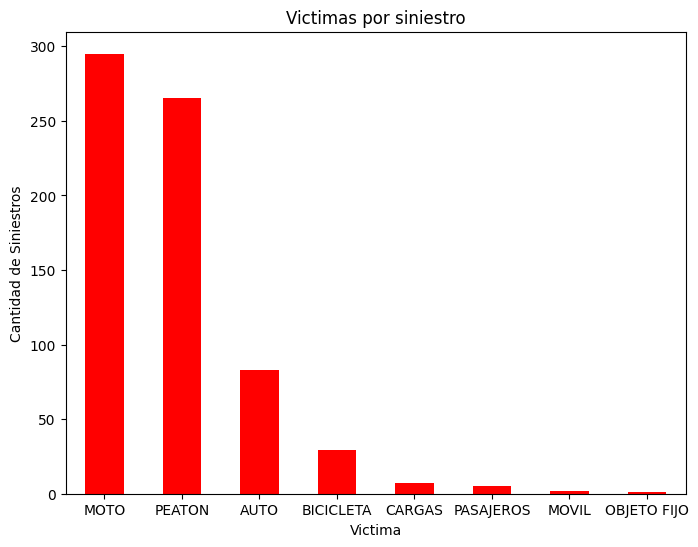

In [270]:
victimas = df_hechos['Victima'].value_counts()
victimas = victimas.drop('SD', axis=0)
plt.figure(figsize=(8, 6))
victimas.plot(kind='bar', color='red')
plt.title('Victimas por siniestro')
plt.xlabel('Victima')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=0) 
plt.show()

In [250]:
muertes_victima = df_hechos['Victimas'].value_counts().reset_index()
muertes_victima.columns = ['Victimas', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Victimas': ['Total'], 'Siniestros': [total_siniestros]})

muertes_victima['Porcentaje'] = (muertes_victima['Siniestros'] / df_hechos['Victimas'].sum() * 100).round(2)
print(muertes_victima)

   Victimas  Siniestros  Porcentaje
0         1         676       94.28
1         2          19        2.65
2         3           1        0.14


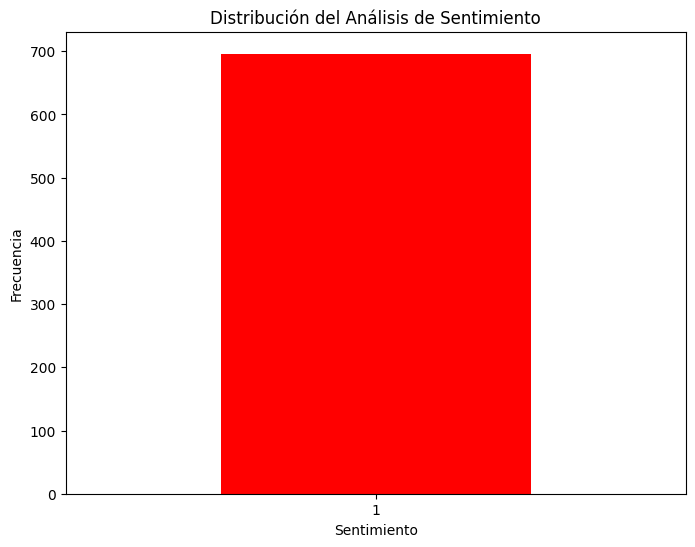

In [265]:
victimas = df_hechos['Victimas'].value_counts()

plt.figure(figsize=(8, 6))
victimas.plot(kind='bar', color='red')
plt.title('Distribución del Análisis de Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
plt.show()

#### Resultados del Analisis:  
* El tipo de victima nos devuelve los diguientes datos:
    * Vemos que las motos y los peatones son por un amplia diferencia la mayor cantidad de siniestros en la ciudad
    * Contrastando con los valores de frnaja horaria antes visto, podemos deducir que la incidencia de horarios que no estan relacionados con las horas pico, se puede tratar de empleados haciendo mensajeria en moto es por eso que vemos estos horarios que son tipicos de los horarios en los que abre y cierran los bancos
        * 10 = 31
        * 11 = 27
        * 12 = 32
        * 13 = 17
        * 14 = 33
        * 15 = 25
    * Cabe destacar que a las 13hs, se suele almorzar en buenos aires, por eso podemos llegar a ver esta baja y a las 14 nuevamente se eleva

### Analisis de Siniestros por `Comuna`

In [192]:
muertes_comuna = df_hechos['Comuna'].value_counts().reset_index()
muertes_comuna.columns = ['Comuna', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Comuna': ['Total'], 'Siniestros': [total_siniestros]})
muertes_comuna = pd.concat([muertes_comuna, fila_total], ignore_index=True)
print(muertes_comuna)


   Comuna  Siniestros
0       1          90
1       4          76
2       9          73
3       8          65
4       7          60
5       3          45
6      15          44
7      13          40
8      12          37
9      14          35
10     11          32
11     10          29
12      2          25
13      5          22
14      6          21
15      0           2
16  Total        1392


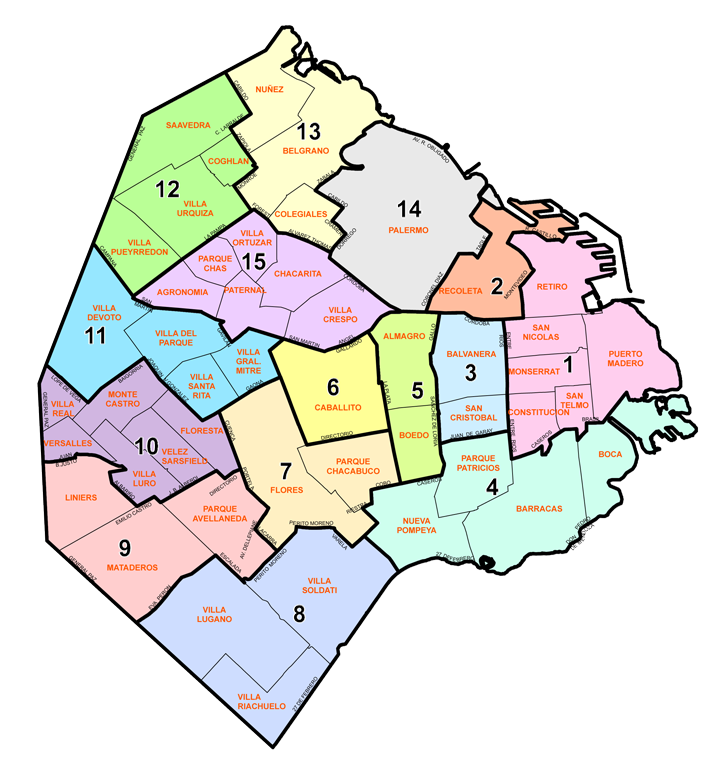

#### Como podemos ver en la imagen, la comuna 1, que es la comprende la "City Porteña", que es el centro financiero, contiene la mayor cantidad de siniestros, lo que corrobora tambien las conclusiones respecto a los horarios y tipo de victima

### Analizamos la franja horaria bancaria

In [200]:

pivot_df= pd.pivot_table(df_hechos, index='Comuna', columns='Franja_horaria', values='Victimas', aggfunc='sum')
pivot_df = pivot_df.drop(0, axis=0)
pivot_df = pivot_df.replace(np.nan, 0)
filtro_horario = pivot_df[pivot_df.columns[pivot_df.columns.isin([10.0, 11.0, 12.0, 13.0, 14.0, 15.0])]]
filtro_horario

Franja_horaria,10.0,11.0,12.0,13.0,14.0,15.0
Comuna,,,,,,
1,5.0,3.0,3.0,1.0,9.0,2.0
2,1.0,1.0,3.0,1.0,1.0,2.0
3,2.0,1.0,1.0,0.0,2.0,1.0
4,5.0,0.0,2.0,2.0,4.0,2.0
5,0.0,2.0,2.0,2.0,1.0,1.0
6,1.0,0.0,1.0,0.0,1.0,1.0
7,2.0,4.0,2.0,1.0,2.0,2.0
8,5.0,0.0,2.0,3.0,2.0,0.0
9,3.0,4.0,6.0,1.0,4.0,5.0


#### Nuevamente vemos como impacta esta franja horaria en los siniestros de la comuna 1 y las demas

### Analizamos los siniestros por `Año`

In [201]:
pivot_df = pd.pivot_table(df_hechos, index='Comuna', columns='Año', values='Victimas', aggfunc='sum')
pivot_df = pivot_df.drop(0, axis=0)
pivot_df


Año,2016,2017,2018,2019,2020,2021
Comuna,,,,,,
1,22.0,20.0,20.0,12.0,10.0,9.0
2,1.0,6.0,7.0,2.0,5.0,4.0
3,8.0,6.0,12.0,2.0,10.0,8.0
4,16.0,17.0,17.0,12.0,4.0,13.0
5,3.0,3.0,4.0,5.0,3.0,4.0
6,3.0,7.0,3.0,2.0,2.0,5.0
7,11.0,12.0,16.0,11.0,6.0,6.0
8,20.0,14.0,12.0,7.0,7.0,7.0
9,12.0,17.0,19.0,9.0,7.0,11.0


#### En un analisis historico por años, tambien vemos que la comuna 1 tiene la mayor cantidad de siniestros, iguala con algunas otras, pero es la de mayor incidencia

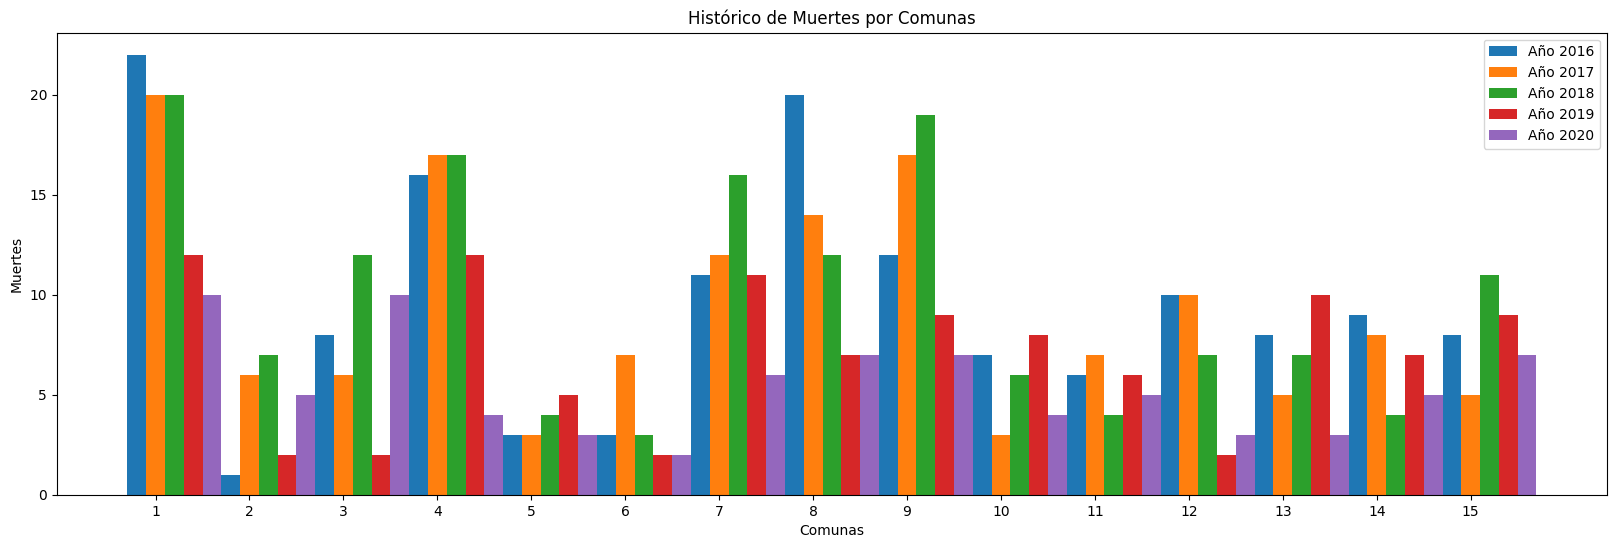

In [202]:
plt.figure(figsize=(20, 6))

# Ancho de las barras
bar_width = 0.2

# Iterar a través de las columnas de años en pivot_df y trazar barras para cada comuna
for i, year in enumerate(range(2016, 2021)):
    # Calcular la posición de las barras para cada año
    bar_positions = np.arange(len(pivot_df.index)) + i * bar_width
    
    plt.bar(bar_positions, pivot_df[year], width=bar_width, label=f'Año {year}')

# Configurar etiquetas y título
plt.xlabel('Comunas')
plt.ylabel('Muertes')
plt.title('Histórico de Muertes por Comunas')

# Mostrar leyenda
plt.legend()

# Establecer manualmente las etiquetas del eje x con todas las comunas
plt.xticks(np.arange(len(pivot_df.index)) + bar_width, pivot_df.index)

# Mostrar el gráfico
plt.show()


#### Resultados del Analisis:  
* Se verifica que ciertas comunas acaparan la mayor cantidad de siniestros.
    * De las 15 comunas, cinco (1, 4, 8, 9 y 7)
    * El año y la comuna con mas siniestros es 2016 y Comuna 1: 22 
    * En 2017 y 2018 tambien en Comuna 1 se registraron mas siniestros: 20 en cda año 

### Analizamos los siniestros por `Acusado`

In [203]:
pivot_df = pd.pivot_table(df_hechos, index='Acusado', columns='Año', values='Victimas', aggfunc='sum')
pivot_df = pivot_df.drop('SD', axis=0)
pivot_df = pivot_df.replace(np.nan, 0)
pivot_df

Año,2016,2017,2018,2019,2020,2021
Acusado,,,,,,
AUTO,39.0,40.0,39.0,34.0,27.0,31.0
BICICLETA,1.0,1.0,1.0,2.0,0.0,2.0
CARGAS,25.0,29.0,38.0,21.0,14.0,23.0
MOTO,14.0,7.0,16.0,8.0,10.0,3.0
MULTIPLE,2.0,4.0,4.0,4.0,1.0,2.0
OBJETO FIJO,9.0,21.0,0.0,7.0,10.0,20.0
OTRO,1.0,0.0,2.0,2.0,0.0,1.0
PASAJEROS,42.0,34.0,47.0,22.0,19.0,14.0
TREN,0.0,0.0,0.0,1.0,0.0,0.0


In [242]:
muertes_acusado = df_hechos['Acusado'].value_counts().reset_index()
muertes_acusado.columns = ['Acusado', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Acusado': ['Total'], 'Siniestros': [total_siniestros]})
muertes_acusado['Porcentaje'] = (muertes_acusado['Siniestros'] / df_hechos['Victimas'].sum() * 100).round(2)

print(muertes_acusado)

       Acusado  Siniestros  Porcentaje
0         AUTO         204       28.45
1    PASAJEROS         173       24.13
2       CARGAS         146       20.36
3  OBJETO FIJO          62        8.65
4         MOTO          57        7.95
5           SD          23        3.21
6     MULTIPLE          17        2.37
7    BICICLETA           7        0.98
8         OTRO           6        0.84
9         TREN           1        0.14


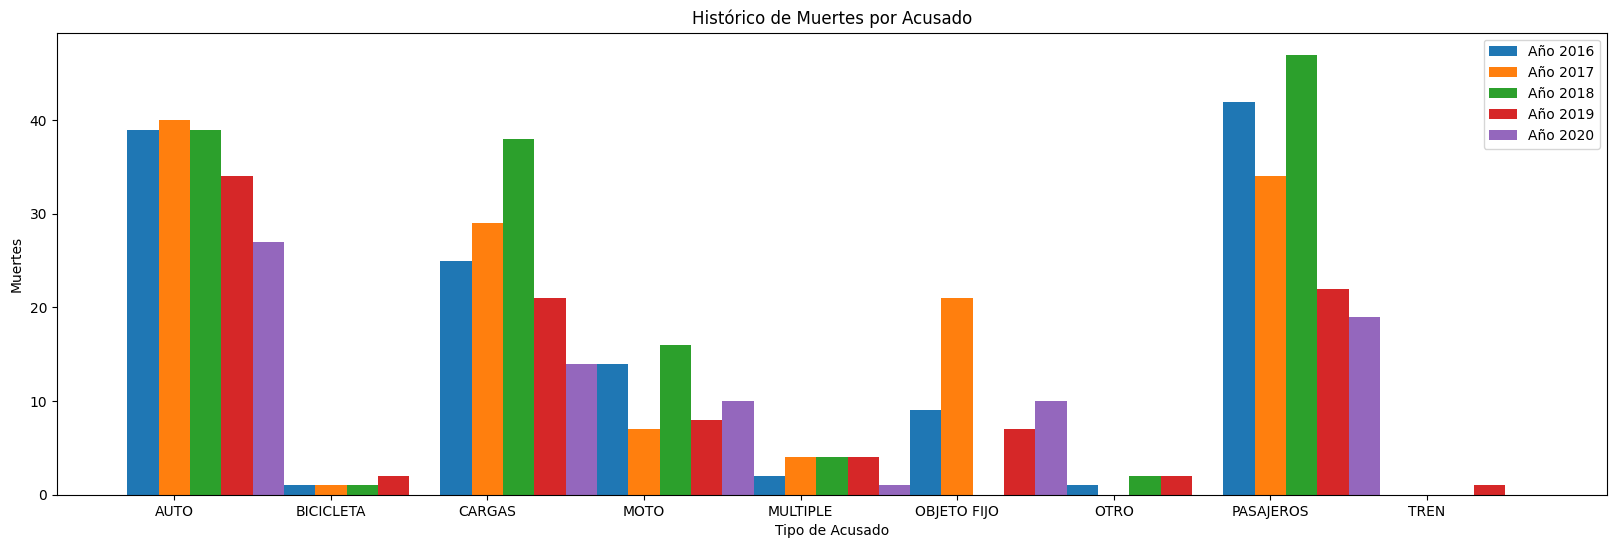

In [146]:
plt.figure(figsize=(20, 6))

# Ancho de las barras
bar_width = 0.2

# Iterar a través de las columnas de años en pivot_df y trazar barras para cada comuna
for i, year in enumerate(range(2016, 2021)):
    # Calcular la posición de las barras para cada año
    bar_positions = np.arange(len(pivot_df.index)) + i * bar_width
    
    plt.bar(bar_positions, pivot_df[year], width=bar_width, label=f'Año {year}')

# Configurar etiquetas y título
plt.xlabel('Tipo de Acusado')
plt.ylabel('Muertes')
plt.title('Histórico de Muertes por Acusado')

# Mostrar leyenda
plt.legend()

# Establecer manualmente las etiquetas del eje x con todas las comunas
plt.xticks(np.arange(len(pivot_df.index)) + bar_width, pivot_df.index)

# Mostrar el gráfico
plt.show()

#### Resultados del Analisis:  
* Se observan los acusados con mas siniestros son.
    * Pasajeros(En este caso es el transporte publico), seguido de los Autos y finalmente transporte de carga como mayores acusados.
    * Motos ocupa el cuarto lugar, salvo el 2017 que objeto fijo supera las cifras, moto tambien es el primero en victimas.
    * Multiple puede incluir cualquiera de los 4 antes mencionados.
    * Objeto fijo, se puede referir a objetos que se encuentran en la via publica tales como, postes, arboles, paredes etc.
    * Bicicleta, tren y otros son la menor medida de causante de accidentes
    

### Analizamos los siniestros por `Tipo de via`, `Acusados` y `Victimas`

In [209]:
def estadisticas_frecuencia_por_comunas(comuna):
    #comuna_nombre = calendar.month_name[comuna]
    comuna_df = df_hechos[df_hechos['Comuna'] == comuna]       
    via_frecuencia_max = comuna_df['Calle'].value_counts().idxmax()
    via_frecuencia_max_count = comuna_df['Calle'].value_counts().iloc[0]
    #via_frecuencia_max_count1 = comuna_df['Calle'].value_counts().idxmax()[0]
    via_frecuencia_max_tipo_calle = df_hechos[df_hechos['Calle'] == via_frecuencia_max]['Tipo_de_via'].str.strip('[]').unique()
    
    return pd.DataFrame({
        'Comuna': [comuna],
        'Via con Mas Siniestros' : [via_frecuencia_max],
        'Cantidad de Siniestros' : [via_frecuencia_max_count],
        'Tipo de via' : [via_frecuencia_max_tipo_calle],
        
    })

# Ciclo a través de cada mes y obtén las estadísticas de frecuencia
resultados = []
for comuna in range(1, 16):
    resultados.append(estadisticas_frecuencia_por_comunas(comuna))

# Convierte los resultados en un DataFrame
resultados_df = pd.concat(resultados)

resultados_df.set_index('Comuna', inplace=True)

resultados_df

,Via con Mas Siniestros,Cantidad de Siniestros,Tipo de via
Comuna,,,
1,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,6,[AUTOPISTA]
2,CORDOBA AV.,4,[AVENIDA]
3,RIVADAVIA AV.,4,[AVENIDA]
4,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,8,[AUTOPISTA]
5,"SALGUERO, JERONIMO",2,"[AVENIDA, CALLE]"
6,DIRECTORIO AV.,3,[AVENIDA]
7,RIVADAVIA AV.,7,[AVENIDA]
8,"PAZ, GRAL. AV.",15,[GRAL PAZ]
9,"PAZ, GRAL. AV.",16,[GRAL PAZ]


In [249]:
muertes_via = df_hechos['Tipo_de_via'].value_counts().reset_index()
muertes_via.columns = ['Tipo de via', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Tipo de via': ['Total'], 'Siniestros': [total_siniestros]})
muertes_via['Porcentaje'] = (muertes_via['Siniestros'] / muertes_via['Siniestros'].sum() * 100).round(2)

print(muertes_via)

  Tipo de via  Siniestros  Porcentaje
0     AVENIDA         429       61.64
1       CALLE         136       19.54
2   AUTOPISTA          66        9.48
3    GRAL PAZ          65        9.34


In [247]:
muertes_via = df_hechos['Acusado'].value_counts().reset_index()
muertes_via.columns = ['Acusado', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Acusado': ['Total'], 'Siniestros': [total_siniestros]})
muertes_via['Porcentaje'] = (muertes_via['Siniestros'] / muertes_via['Siniestros'].sum() * 100).round(2)

print(muertes_via)

       Acusado  Siniestros  Porcentaje
0         AUTO         204       29.31
1    PASAJEROS         173       24.86
2       CARGAS         146       20.98
3  OBJETO FIJO          62        8.91
4         MOTO          57        8.19
5           SD          23        3.30
6     MULTIPLE          17        2.44
7    BICICLETA           7        1.01
8         OTRO           6        0.86
9         TREN           1        0.14


In [246]:
muertes_victima = df_hechos['Victima'].value_counts().reset_index()
muertes_victima.columns = ['Victima', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Victima': ['Total'], 'Siniestros': [total_siniestros]})
muertes_victima['Porcentaje'] = (muertes_acusado['Siniestros'] / df_hechos['Victimas'].sum() * 100).round(2)

print(muertes_victima)

       Victima  Siniestros  Porcentaje
0         MOTO         295       28.45
1       PEATON         265       24.13
2         AUTO          83       20.36
3    BICICLETA          29        8.65
4           SD           9        7.95
5       CARGAS           7        3.21
6    PASAJEROS           5        2.37
7        MOVIL           2        0.98
8  OBJETO FIJO           1        0.84


#### Resultados del Analisis:
* Podemos inferir informacion pertinente:
    * Los nombres van a ser normalizados en Power BI
    * En las comunas 8, 9, 11 y 12, la Gral Paz es la via con mas siniestros
    * De todas las vias de la ciudad, en la Gral Paz ocurrieron la mayor cantidad de siniestros: 52 ocurrencias 
    * La mayor cantidad de siniestros se produjeron en avenidas: 61%  
    * El tipo de vehiculo causante de mas siniestro fue el auto (29.31%) seguido de los de pasajeros (24.9%)  
    * El tipo de vehiculo que padecio de mas siniestro fue el moto (28.45%), seguido de los peatones (24.13%)  